Machine Learning application of NLP sentiment analysis using IMDB review dataset.

Data source: [50k IMDB Review Dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

The objective of this project is to produce a machine learning model.
Input: review text
Output: Positive (1) or negative (0) sentiment


Flow:


*   Load data and library imports
*   Clean of text data using regular expressions and NLTK corpus stopword
*   EDA using python (top words/data distribution)
*   Create a machine learning pipeline using the following processes
> 1. TfIdfVectorizer (to convert text into numeric values for machine-readable
> 2. Naive Bayes Classifier

There are 2 machine learning pipelines:
*   Baseline model
*   GridSearchCV model (to find best parameter for Naive Bayes classifier, with alpha values from 0 to 10)


Result:
- The Naive Bayes model having alpha parameter of 1.0 performs the best










In [2]:
import re
import string

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [3]:
# %config ipcompleter.useJedi = False

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file = '/content/drive/MyDrive/Datasets/IMDB_Reviews/IMDB Dataset.csv'
df = pd.read_csv(file)
df.sample(10)

,review,sentiment
32603,Wow what a great premise for a film : Set it a...,negative
29962,"""Amazing Grace"" has a languid feel to it as it...",positive
41943,This movie is a perfect example of a film that...,positive
6251,"Since watching the trailer in ""The Little Merm...",positive
9742,The Five Deadly Venoms is easily the most memo...,positive
16859,Interesting to read comments by viewers regard...,negative
1646,"I saw this ""movie"" partly because of the sheer...",negative
28280,I've seen this movie more than once. It isn't ...,positive
35628,I had to compare two versions of Hamlet for my...,negative
24970,It's a refreshing breath of air when a movie a...,positive


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import string
from sklearn.feature_extraction import text

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
stopw = list(text.ENGLISH_STOP_WORDS) + ' '.join(string.punctuation).split() + stopwords.words('english')

In [10]:
def clean_text(text):
  text = re.sub(r'\<.*?\>|\.{2,}|\(|\)', "" , text) 
  text = re.sub(r'[^\w\s]+', '', text)
  text = [a.lower() for a in text.split() if a.lower() not in stopw]
  text = " ".join(text)
  return text

In [11]:
df['clean'] = df.review.apply(clean_text)

In [12]:
df['len_ori'] = [len(a) for a in df.review]
df['len_clean'] = [len(a) for a in df.clean]

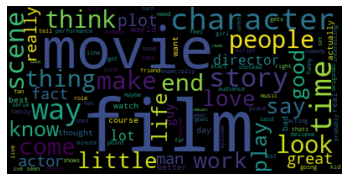

In [13]:
wc = WordCloud(max_words=100).generate(' '.join(df.clean))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

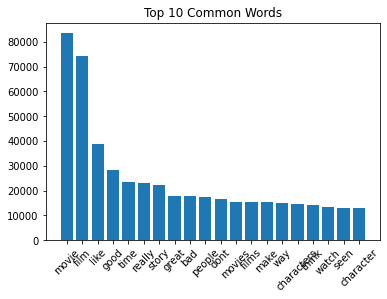

In [14]:
# list_of_words = [a.split() for a in df.clean]
counter = Counter(" ".join(df.clean).split(' ')).most_common(20)
x_com = [x for x,y in counter]
y_com = [y for x,y in counter]
plt.bar(x_com, y_com)
plt.title('Top 10 Common Words')
plt.xticks(rotation=45);

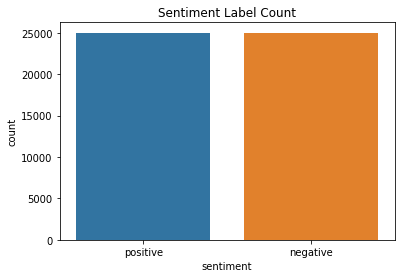

In [15]:
sns.countplot(x=df.sentiment)
plt.title('Sentiment Label Count');

In [16]:
(len(df)/500)

100.0

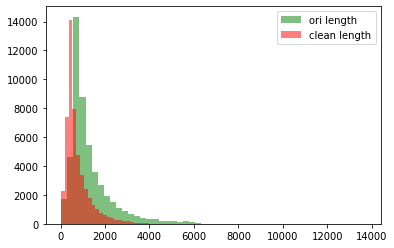

In [17]:
plt.hist(df.len_ori, bins = int(len(df)/1000), alpha = 0.5, color='g', label='ori length')
plt.hist(df.len_clean, bins = int(len(df)/1000), alpha= 0.5, color='r', label='clean length')
plt.legend();

In [18]:
df.head()

,review,sentiment,clean,len_ori,len_clean
0,One of the other reviewers has mentioned that ...,positive,reviewers mentioned watching 1 oz episode youl...,1761,1056
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,998,605
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,926,540
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...,748,433
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,1317,786


In [19]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay, auc, RocCurveDisplay, roc_curve, roc_auc_score, accuracy_score

In [20]:
X = df.clean
y = df.sentiment.map({'positive':1, 'negative':0})

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
def ml(preprocess=TfidfVectorizer(), model=MultinomialNB(), x=X, y=y):

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  pipe = make_pipeline(preprocess, model)
  pipe.fit(x_train, y_train)
  y_predict = pipe.predict(x_test)

  fig, ax = plt.subplots(3,1, figsize=(6,12))
  
  # ax = plt.subplot(311)
  cm = confusion_matrix(y_test, y_predict, labels=pipe.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot(ax=ax[0])
  ax[0].set_title('Confusion Matrix')
  
  # ax1 = plt.subplot(312)
  precision, recall, _ = precision_recall_curve(y_test, y_predict)
  disp1 = PrecisionRecallDisplay(precision=precision, recall=recall)
  disp1.plot(ax=ax[1])
  ax[1].set_title('Precision Recall Curve')

  # ax2 = plt.subplot(313)
  fpr, tpr, thresholds = roc_curve(y_test, y_predict)
  roc_auc = auc(fpr, tpr)
  disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='MultinomialNB')
  ax[2].set_title(f'ROC AUC Score: {roc_auc_score(y_test, y_predict):.3f}')
  disp2.plot(ax=ax[2])
  plt.tight_layout()
  plt.show()

  print(f'Accuracy Score: {accuracy_score(y_test, y_predict):.3f}')

  a = (y_predict, accuracy_score(y_test, y_predict))
  return a


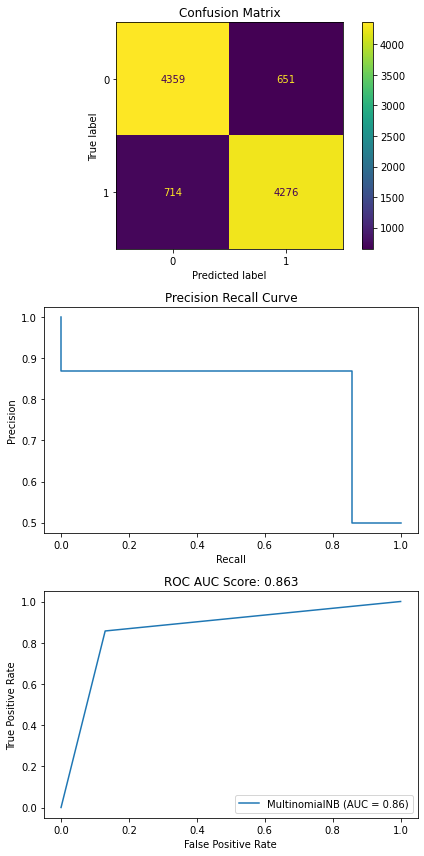

Accuracy Score: 0.864


(array([0, 1, 0, ..., 0, 0, 1]), 0.8635)

In [23]:
ml()

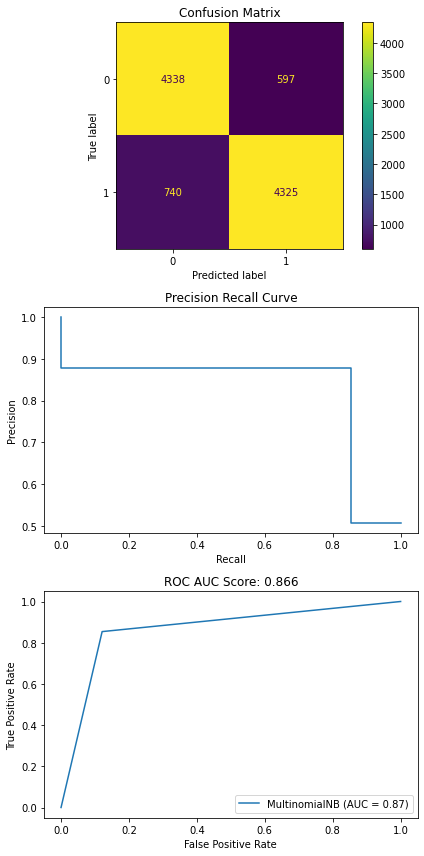

Accuracy Score: 0.866


(array([1, 0, 0, ..., 1, 1, 1]), 0.8663)

In [24]:
ml(x=df[['clean', 'len_ori', 'len_clean']], y=df.sentiment.map({'positive':1, 'negative':0}))

In [25]:
# list(np.linspace(0.1, 1, 10))


In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


gs = make_pipeline(TfidfVectorizer(), GridSearchCV(MultinomialNB(), 
                                                   param_grid={'alpha': [x for x in np.linspace(0.1,1,10)]}, cv=4, refit=True)
                                                   )

gs.fit(x_train, y_train)
y_gs = gs.predict(x_test)

vectorizer = TfidfVectorizer()
mnb = MultinomialNB()
pipe = Pipeline(steps = [('vect', vectorizer) , ('multinomial', mnb)])

param_grid = {'multinomial__alpha': [x for x in np.linspace(0.1,10,50)]}

search = GridSearchCV(pipe, param_grid, n_jobs=5, cv=5, refit=True, verbose =2 )

search.fit(x_train, y_train)

print(f'GS best params :{search.best_params_}')
print(f'GS best score :{search.best_score_}')
print(pd.DataFrame(search.cv_results_))

# fig, ax = plt.subplots(3,1, figsize=(6,12))

# # ax = plt.subplot(311)
# cm = confusion_matrix(y_test, y_predict, labels=pipe.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
# disp.plot(ax=ax[0])
# ax[0].set_title('Confusion Matrix')

# # ax1 = plt.subplot(312)
# precision, recall, _ = precision_recall_curve(y_test, y_predict)
# disp1 = PrecisionRecallDisplay(precision=precision, recall=recall)
# disp1.plot(ax=ax[1])
# ax[1].set_title('Precision Recall Curve')

# # ax2 = plt.subplot(313)
# fpr, tpr, thresholds = roc_curve(y_test, y_predict)
# roc_auc = auc(fpr, tpr)
# disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='MultinomialNB')
# ax[2].set_title(f'ROC AUC Score: {roc_auc_score(y_test, y_predict):.3f}')
# disp2.plot(ax=ax[2])
# plt.tight_layout()
# plt.show()

display(f'Accuracy Score: {accuracy_score(y_test, y_gs):.3f}')



Fitting 5 folds for each of 50 candidates, totalling 250 fits
GS best params :{'multinomial__alpha': 1.1102040816326533}
GS best score :0.8634999999999999
    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        6.390749      0.802857  ...        0.003073               39
1        6.136646      0.319570  ...        0.002834               15
2        6.295800      0.310480  ...        0.002781                7
3        6.151881      0.416961  ...        0.002906                6
4        6.073144      0.277546  ...        0.003002                4
5        6.268252      0.279919  ...        0.002796                1
6        6.270306      0.405141  ...        0.001816                2
7        6.181566      0.275347  ...        0.001693                3
8        6.346512      0.339723  ...        0.002002                5
9        6.236724      0.188609  ...        0.002140                8
10       6.329656      0.528260  ...        0.002598                9
11   

'Accuracy Score: 0.866'

In [28]:
grid_result = pd.DataFrame(search.cv_results_)
grid_result[grid_result['rank_test_score'] <= 5].sort_values('rank_test_score')[['rank_test_score','param_multinomial__alpha','mean_test_score']]

,rank_test_score,param_multinomial__alpha,mean_test_score
5,1,1.110204,0.863500
6,2,1.312245,0.863175
7,3,1.514286,0.863050
4,4,0.908163,0.862950
8,5,1.716327,0.862850
